<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Final Project // Statistical Treatment for Retail Dataset</font></h1>

# Pengenalan

### Latar Belakang
Final project berlatang belakang data klasifikasi Job Family dibeberapa platform learning yang masih dilakukan secara manual, dan subjektif dari masing-masing admin yang menginputkan job family. 

### Tujuan
Final project ini akan melakukan text classification dengan target label yaitu job family berdasarkan fitur title dan deskripsi dari course yang ada.

### Data
Data yang digunakan adalah 11301 data course dari kampiun dan digital learning yang telah memiliki label Job Family

# Import Library

In [4]:
import pandas as pd
import numpy as np
import pickle
from sklearn import preprocessing
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.corpus import wordnet as wn
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn import model_selection, naive_bayes, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Algoritma klasifikasi
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

# Data Loading & Exploratory Data Analysis

In [5]:
# Add the Data using pandas
Corpus_telkom = pd.read_csv("dataset/20210122-Kampiun Digilib Clean-jfam-jfunc.csv",encoding='latin-1')

# Cut data for testing
# Corpus_telkom = Corpus_telkom[:300]

Corpus_telkom

,source,org_id,doc_id,doc_title,doc_description,Job Family,Job Function,job_role,job_role_clean
0,Kampiun,NaN,27243,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,5.2.3 Learning &amp; Development,Learning & Development
1,Kampiun,NaN,29134,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,5.2.3 Learning &amp; Development,Learning & Development
2,Kampiun,NaN,28690,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,2.1.1 Internal &amp; External Analysis,Internal & External Analysis
3,Kampiun,NaN,33756,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,1.1.6 Access Network O&amp;M,Access Network Operation & Maintenance
4,Kampiun,NaN,38567,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,1.1.2 Access Network Design &amp; Planning,Access Network Design & Planning
...,...,...,...,...,...,...,...,...,...
11296,Kampiun,NaN,35659,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,3.2.1 Sales Management,Sales Management
11297,Kampiun,NaN,38867,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,1.2.2 IT Solution Development,IT Solution Development
11298,Kampiun,NaN,40529,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,5.7.3 Education Operation,Education Operation
11299,Kampiun,NaN,39161,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,1.2.4 IT Operations,IT Operations


<AxesSubplot:>

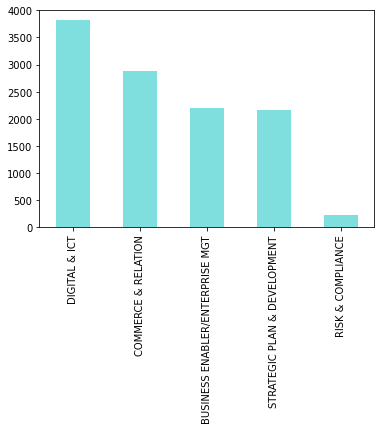

In [6]:
# Corpus_telkom['Job Family'].value_counts()
Corpus_telkom['Job Family'].value_counts().plot(
                        kind='bar',
                        alpha=0.5,                         
                        color='c'
                        )

In [7]:
Corpus_telkom['title_desc'] = Corpus_telkom['doc_title'].fillna('')+" "+Corpus_telkom['doc_description'].fillna('')
Corpus_telkom

,source,org_id,doc_id,doc_title,doc_description,Job Family,Job Function,job_role,job_role_clean,title_desc
0,Kampiun,NaN,27243,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,5.2.3 Learning &amp; Development,Learning & Development,Case Study 1 tahun Magang di Kementerian BUMN
1,Kampiun,NaN,29134,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,5.2.3 Learning &amp; Development,Learning & Development,Case Study 1 tahun Magang di Kementerian BUMN
2,Kampiun,NaN,28690,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,2.1.1 Internal &amp; External Analysis,Internal & External Analysis,ILC : Securing Revenue Witel Riau Daratan 2017
3,Kampiun,NaN,33756,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,1.1.6 Access Network O&amp;M,Access Network Operation & Maintenance,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR
4,Kampiun,NaN,38567,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,1.1.2 Access Network Design &amp; Planning,Access Network Design & Planning,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL ...
...,...,...,...,...,...,...,...,...,...,...
11296,Kampiun,NaN,35659,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,3.2.1 Sales Management,Sales Management,PENTINGNYA LOYALITAS PELANGGAN Ditengah-tengah...
11297,Kampiun,NaN,38867,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,1.2.2 IT Solution Development,IT Solution Development,Uji Terima Online dalam Proyek Digitalisasi SP...
11298,Kampiun,NaN,40529,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,5.7.3 Education Operation,Education Operation,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKE...
11299,Kampiun,NaN,39161,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,1.2.4 IT Operations,IT Operations,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...


In [8]:
Corpus_telkom.drop([
    'source', 'org_id', 'doc_id', 'job_role','job_role_clean'
], axis=1, inplace=True)
Corpus_telkom

,doc_title,doc_description,Job Family,Job Function,title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,Case Study 1 tahun Magang di Kementerian BUMN
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,Case Study 1 tahun Magang di Kementerian BUMN
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ILC : Securing Revenue Witel Riau Daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL ...
...,...,...,...,...,...
11296,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,PENTINGNYA LOYALITAS PELANGGAN Ditengah-tengah...
11297,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,Uji Terima Online dalam Proyek Digitalisasi SP...
11298,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKE...
11299,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...


In [9]:
Corpus_telkom
# Corpus_telkom.loc[Corpus_telkom['title_desc'].str.contains('yg')]
# Corpus_telkom.loc[Corpus_telkom['doc_title'].str.contains('yg')]
# Corpus_telkom['title_desc'][536]

,doc_title,doc_description,Job Family,Job Function,title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,Case Study 1 tahun Magang di Kementerian BUMN
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,Case Study 1 tahun Magang di Kementerian BUMN
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ILC : Securing Revenue Witel Riau Daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL ...
...,...,...,...,...,...
11296,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,PENTINGNYA LOYALITAS PELANGGAN Ditengah-tengah...
11297,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,Uji Terima Online dalam Proyek Digitalisasi SP...
11298,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKE...
11299,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...


# Data Preprocessing

In [10]:
# Corpus_telkom['title_desc'] = Corpus_telkom['title_desc'].str.replace('yg', '')

In [11]:
# ubah semua jadi lower case
Corpus_telkom['title_desc'] = [str(entry).lower() for entry in Corpus_telkom['title_desc']]

In [12]:
# Tokenization : kalimat dipecah menjadi perkata
Corpus_telkom['title_desc']= [word_tokenize(entry) for entry in Corpus_telkom['title_desc']]

In [13]:
# fungsi lemmatizer perlu pos tags untuk mengetahui jenis kata (noun, verb atau adjective)
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [14]:
# stopwords, stemming and storing

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


for index, entry in enumerate(Corpus_telkom['title_desc']):    
    Final_words = []
    # inisialisasi WordNetLemmatizer(): 'rocks' -> 'rock' ; better -> good
    word_Lemmatized = WordNetLemmatizer()    
    for word, tag in pos_tag(entry):
        # remove stopwords dan hanya alfabet
        if word not in stopwords.words('indonesian') and word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            word_Final = stemmer.stem(word_Final)
            Final_words.append(word_Final)    
    Corpus_telkom.loc[index,'title_desc_final'] = str(Final_words)

In [15]:
# Corpus_telkom['title_desc_final']
# Corpus_telkom.loc[Corpus_telkom['title_desc_final'].str.contains('pt')]
# Corpus_telkom['title_desc_final'][1927]

In [16]:
# remove singkatan
Corpus_telkom['title_desc_final'] = Corpus_telkom['title_desc_final'].str.replace('pt', '')

# Model Definition & Training

In [35]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus_telkom['title_desc_final'], Corpus_telkom['Job Family'], test_size=0.2, random_state=1)
# Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus_telkom[['doc_title','doc_description']].astype(str), Corpus_telkom['Job Family'], test_size=0.3, random_state=4)

# Target label diubah jadi angka
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [36]:
# kata input menjadi vector dgn TFIDF: mencari tingkat kepentingan sebuah kata dalam dokumen dan dibobotkan
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Train_X)

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)


In [37]:
(Train_X.shape, Test_X.shape, Train_Y.shape, Test_Y.shape )

((9040,), (2261,), (9040,), (2261,))

In [38]:
# Naive Bayes
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Test_X_Tfidf)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)


#SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)


#Random Forest
clf=RandomForestClassifier(n_estimators=98) #0.3290579389650597:98
clf.fit(Train_X_Tfidf,Train_Y)
predictions_clf = clf.predict(Test_X_Tfidf)
print("Random Forest Accuracy Score -> ",accuracy_score(predictions_clf, Test_Y)*100)


# Logistic Regression
logReg = LogisticRegression(solver='liblinear', random_state=0)
logReg.fit(Train_X_Tfidf,Train_Y)
predictions_logReg = logReg.predict(Test_X_Tfidf)
print("Logistic Regression Accuracy Score -> ", accuracy_score(predictions_logReg, Test_Y)*100)


# KNN
knn = KNeighborsClassifier(n_neighbors=61) #error 0.38390092879256965
knn.fit(Train_X_Tfidf,Train_Y)
predictions_knn = knn.predict(Test_X_Tfidf)
print("KNN Accuracy Score -> ", accuracy_score(predictions_knn, Test_Y)*100)

# Decision Tree
dct = DecisionTreeClassifier()
dct = dct.fit(Train_X_Tfidf,Train_Y)
predictions_dct = dct.predict(Test_X_Tfidf)
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_dct, Test_Y)*100)



Naive Bayes Accuracy Score ->  62.5829279080053
SVM Accuracy Score ->  65.76735957540912
Random Forest Accuracy Score ->  66.29809818664307
Logistic Regression Accuracy Score ->  65.81158779301194
KNN Accuracy Score ->  61.60990712074303
Decision Tree Accuracy Score ->  55.24104378593543


# Model Evaluation

Text(0, 0.5, 'Error mean')

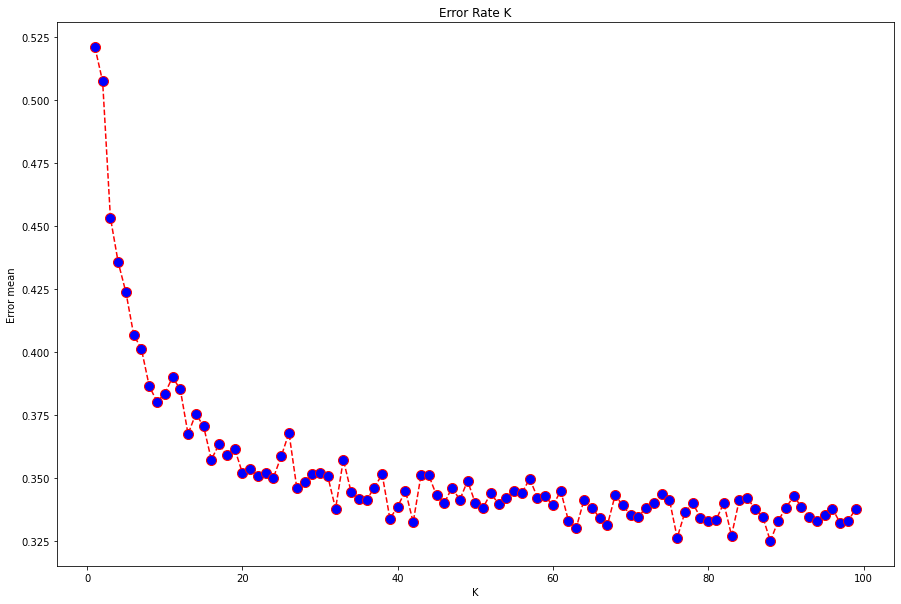

In [39]:
# find minimize error for Highest Score Algorithm
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 100):  
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(Train_X_Tfidf,Train_Y)
    predictions_clf = clf.predict(Test_X_Tfidf)
    error.append(np.mean(predictions_clf != Test_Y))    
    
plt.figure(figsize=(15, 10))  
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [40]:
#Random Forest
clf=RandomForestClassifier(n_estimators=98)
clf.fit(Train_X_Tfidf,Train_Y)
predictions_clf = clf.predict(Test_X_Tfidf)
print("Random Forest Accuracy Score -> ",accuracy_score(predictions_clf, Test_Y)*100)
print("Random Forest Error -> ",(np.mean(predictions_clf != Test_Y))*100) 

# 0.34188412206988056: 90
# 0.32994250331711633: 100
# 0.3290579389650597:98

Random Forest Accuracy Score ->  66.38655462184873
Random Forest Error ->  33.61344537815126


In [41]:
clf.classes_

array([0, 1, 2, 3, 4])

# Model Inference

In [42]:
Encoder.inverse_transform(clf.predict(Tfidf_vect.transform(['ini adalah course terkait human capital'])))

array(['BUSINESS ENABLER/ENTERPRISE MGT'], dtype=object)

In [43]:
Encoder.inverse_transform(clf.predict(Tfidf_vect.transform(['ini adalah course terkait Digital marketing'])))

array(['COMMERCE & RELATION'], dtype=object)

In [44]:
Encoder.inverse_transform(clf.predict(Tfidf_vect.transform(['ini adalah course terkait Digital teknologi'])))

array(['DIGITAL & ICT'], dtype=object)

# Model Save & Reload

In [45]:
# pickle.dump(clf, open('rfclassifier_jfam-v03.pkl','wb'))

In [46]:
pickle.dump(Tfidf_vect, open('Tfidf_vect.pkl','wb'))

In [47]:
pickle.dump(Encoder, open('Encoder.pkl','wb'))

In [48]:
load_rfclassifier_jfam = pickle.load(open('rfclassifier_jfam-v03.pkl', 'rb'))

In [49]:
Encoder.inverse_transform(load_rfclassifier_jfam.predict(Tfidf_vect.transform(['training'])))

array(['DIGITAL & ICT'], dtype=object)

In [50]:
predictions_clf = load_rfclassifier_jfam.predict(Test_X_Tfidf)
print("Loaded Random Forest Accuracy Score  -> ",accuracy_score(predictions_clf, Test_Y)*100)
print("Loaded Random Forest Error -> ",(np.mean(predictions_clf != Test_Y))*100) 

Loaded Random Forest Accuracy Score  ->  65.63467492260062
Loaded Random Forest Error ->  34.36532507739938


# Summary
Hasil prediksi tertinggi diperoleh dengan algoritma Random Forest (66%), sehingga tujuan final project untuk melakukan klasifikasi dengan fitur title dan deskripsi course sudah tercapai. Untuk pengembangan selanjutnya, data fitur judul course dan desckripsi masih perlu ditambahkan, khususnya pada label 'Risk & Compliance' karena jumlah data tidak seimbang dengan label lainnya, dan juga pre-processing lanjutan perlu dilakukan dengan dukungan library NLP versi bahasa Indonesia agar dapat lebih meningkatkan akurasi.

# Notes Accuracy

In [51]:
# Naive Bayes Accuracy Score ->  63.37903582485625
# SVM Accuracy Score ->  65.54621848739495
# Random Forest Accuracy Score ->  65.28084918177798
# Logistic Regression Accuracy Score ->  65.4577620521893
# Decision Tree Accuracy Score ->  54.79876160990712